<a href="https://colab.research.google.com/github/SnehaDharne/GDM-diagnosis/blob/main/FeatureImportances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path='/content/drive/MyDrive/datasets for colab/pima-indians-diabetes.csv'
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [ ]:
df=pd.read_csv(path)
# make age category column which will help age-appropriate in filling values which are 0
df['age_category'] = pd.cut(df['Age'], bins=[0, 21, 31, 41, 51, 61, 71, 81, np.inf], labels=[1,2,3,4,5,6,7,8])
df['age_category'] = df['age_category'].astype(int)
agecat = [1,2,3,4,5,6,7,8]


features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']
for feature in features:
  for agec in agecat:
        if df[feature].dtype == 'float64':
            df[feature].replace(0, round(df[df['age_category'] == agec][feature].median(), 1), inplace=True)
        else:
            df[feature].replace(0, round(df[df['age_category'] == agec][feature].median(), 0), inplace=True)




from scipy import stats
import numpy as np
z= np.abs(stats.zscore(df))

threshold = 3

df = df[(z < 3).all(axis=1)]

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr= q3-q1

df = df[~((df <(q1 - 1.5 * iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
#RandomForest

In [ ]:
rf = RandomForestClassifier(n_jobs=-1 ,n_estimators=700, oob_score = True, max_features='sqrt')
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        82
           1       0.68      0.64      0.66        36

    accuracy                           0.80       118
   macro avg       0.76      0.75      0.76       118
weighted avg       0.79      0.80      0.79       118



Variable: Glucose              Importance: 0.26
Variable: BMI                  Importance: 0.16
Variable: DiabetesPedigreeFunction Importance: 0.13
Variable: Age                  Importance: 0.12
Variable: Pregnancies          Importance: 0.09
Variable: BloodPressure        Importance: 0.08
Variable: SkinThickness        Importance: 0.06
Variable: Insulin              Importance: 0.06
Variable: age_category         Importance: 0.04


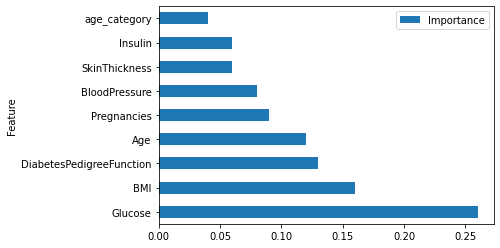

In [ ]:
df1=df.drop('Outcome',axis=1, inplace=True)
df1_list= list(df.columns)
df2=np.array(df1)
import matplotlib.pyplot as plt
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(df1_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
feature_importance = pd.DataFrame(feature_importances, columns =['Feature', 'Importance'])
ax = feature_importance.plot.barh(x='Feature', y='Importance')



In [ ]:
#XGboost
df=pd.read_csv(path)
# make age category column which will help age-appropriate in filling values which are 0
df['age_category'] = pd.cut(df['Age'], bins=[0, 21, 31, 41, 51, 61, 71, 81, np.inf], labels=[1,2,3,4,5,6,7,8])
df['age_category'] = df['age_category'].astype(int)
agecat = [1,2,3,4,5,6,7,8]


features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI','Insulin']
for feature in features:
  for agec in agecat:
        if df[feature].dtype == 'float64':
            df[feature].replace(0, round(df[df['age_category'] == agec][feature].median(), 1), inplace=True)
        else:
            df[feature].replace(0, round(df[df['age_category'] == agec][feature].median(), 0), inplace=True)




from scipy import stats
import numpy as np
z= np.abs(stats.zscore(df))

threshold = 3

df = df[(z < 3).all(axis=1)]

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr= q3-q1

df = df[~((df <(q1 - 1.5 * iqr))|(df>(q3+1.5*iqr))).any(axis=1)]

from sklearn.model_selection import train_test_split
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
xgbc = xgb.XGBClassifier(
 learning_rate = 0.01,
 n_estimators= 2000,
 max_depth= 9,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)

In [ ]:
y_pred = xgbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
model_mse = mean_squared_error(y_pred, y_test)
print(model_mse)
print(classification_report(y_test, y_pred))

[[70 12]
 [12 24]]
Accuracy: 0.7966101694915254
0.2033898305084746
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        82
           1       0.67      0.67      0.67        36

    accuracy                           0.80       118
   macro avg       0.76      0.76      0.76       118
weighted avg       0.80      0.80      0.80       118



In [ ]:
df1=df.drop('Outcome',axis=1, inplace= True )
df1_list= list(df.columns)
df2=np.array(df1)
import matplotlib.pyplot as plt
# Get numerical feature importances
importances = list(xgbc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(df2, round(importance, 2)) for df2, importance in zip(df1_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importance = pd.DataFrame(feature_importances, columns =['Feature', 'Importance'])


Variable: age_category         Importance: 0.20000000298023224
Variable: Glucose              Importance: 0.18000000715255737
Variable: BMI                  Importance: 0.10999999940395355
Variable: Age                  Importance: 0.10000000149011612
Variable: Insulin              Importance: 0.09000000357627869
Variable: DiabetesPedigreeFunction Importance: 0.09000000357627869
Variable: Pregnancies          Importance: 0.07999999821186066
Variable: BloodPressure        Importance: 0.07999999821186066
Variable: SkinThickness        Importance: 0.07999999821186066


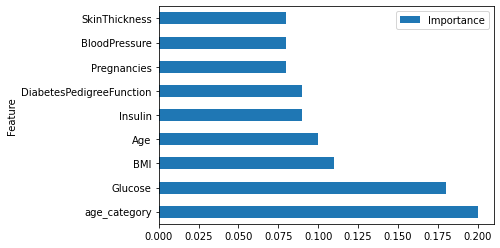

In [ ]:
ax = feature_importance.plot.barh(x='Feature', y='Importance')
